# Bernoulli's Principle and Differential Equations

This notebook explores Bernoulli's Principle, not just as an algebraic formula, but as a solution to the differential equations governing fluid motion (Euler's Equations).

## 1. Mathematical Derivation

For an inviscid, incompressible flow along a streamline, Newton's Second Law gives us Euler's Equation:

$$ \frac{\partial v}{\partial t} + v \frac{\partial v}{\partial s} = -\frac{1}{\rho} \frac{\partial P}{\partial s} - g \frac{\partial z}{\partial s} $$

For steady flow ($\frac{\partial v}{\partial t} = 0$), this becomes:

$$ v dv + \frac{dP}{\rho} + g dz = 0 $$

We will use `sympy` to integrate this differential form.

In [6]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
P, v, z, rho, g = sp.symbols('P v z rho g', real=True)

# Define the differential form of Bernoulli's equation
# dP/rho + v dv + g dz = 0
# We strictly integrate with respect to the state variables

expr = (1/rho)*sp.Differential(P) + v*sp.Differential(v) + g*sp.Differential(z)

# Integrate term by term
term1 = sp.integrate(1/rho, P)
term2 = sp.integrate(v, v)
term3 = sp.integrate(g, z)

bernoulli_eq = sp.Eq(term1 + term2 + term3, sp.Symbol('Constant'))
bernoulli_eq

AttributeError: module 'sympy' has no attribute 'Differential'

The result is the famous Bernoulli Equation:
$$ \frac{P}{\rho} + \frac{v^2}{2} + gz = \text{Constant} $$

## 2. Simulation: Flow in a Venturi Tube

We will simulate flow through a pipe with varying cross-sectional area $A(x)$.

**Governing Equations:**
1.  **Continuity (Mass Conservation):** $Q = A(x) v(x) = \text{constant}$ $\implies v(x) = \frac{Q}{A(x)}$
2.  **Bernoulli (Momentum Conservation):** $P(x) + \frac{1}{2}\rho v(x)^2 + \rho g z(x) = \text{constant}$

In [4]:
# Parameters
L = 10.0          # Length of pipe (m)
rho_val = 1000.0  # Density (kg/m^3)
Q = 0.5           # Flow rate (m^3/s)
P0 = 101325.0     # Inlet pressure (Pa)

# Define Geometry (Venturi Shape)
x = np.linspace(0, L, 200)

# Define a radius function r(x): Consists mainly of contraction in the middle
def radius_function(x):
    base_r = 0.5
    # Gaussian contraction at center
    contraction = 0.2 * np.exp(-0.5 * ((x - L/2) / 1.0)**2)
    return base_r - contraction

r = radius_function(x)
A = np.pi * r**2
z = np.zeros_like(x) # Horizontal pipe

# 1. Solve for Velocity (Continuity)
v = Q / A

# 2. Solve for Pressure (Bernoulli)
# P0 + 0.5*rho*v0^2 = P(x) + 0.5*rho*v(x)^2
v0 = v[0]
Total_Head = P0 + 0.5 * rho_val * v0**2

P = Total_Head - 0.5 * rho_val * v**2

## 3. Visualization

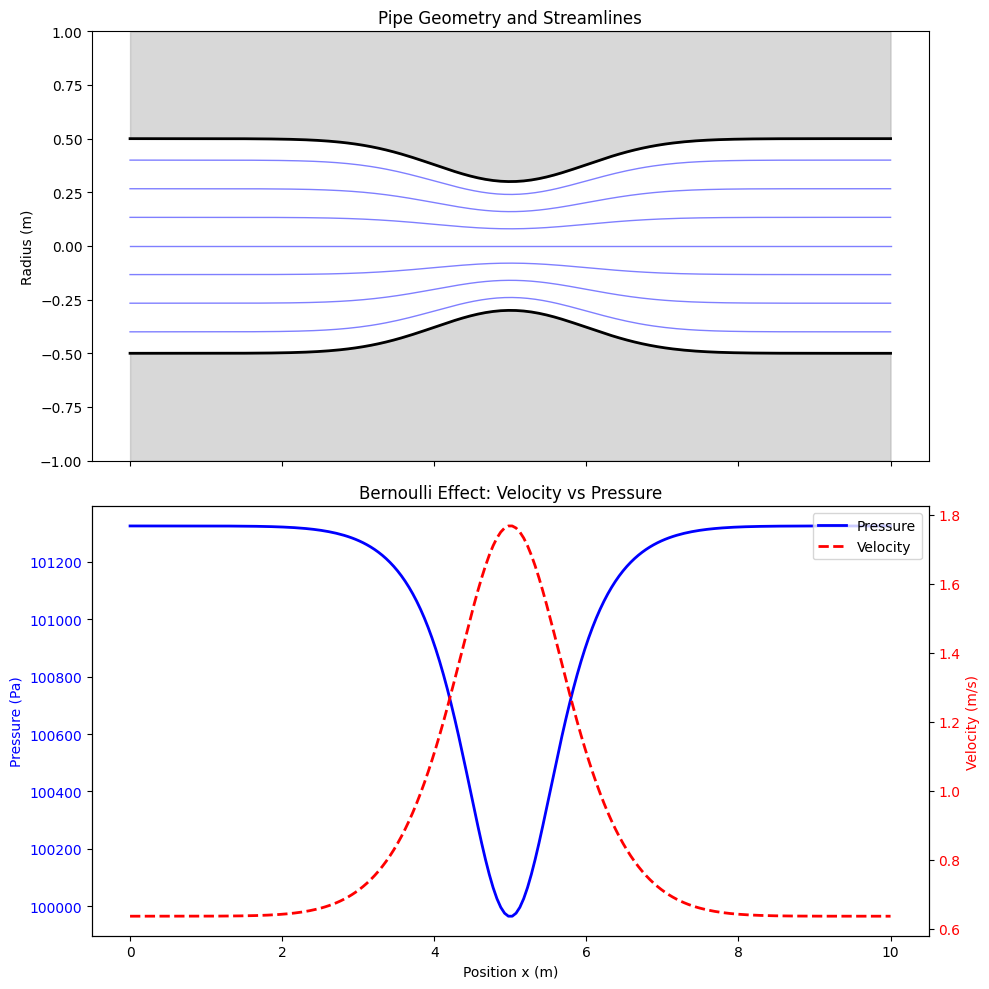

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# Plot 1: Geometry
ax1.set_title("Pipe Geometry and Streamlines")
ax1.set_ylabel("Radius (m)")
ax1.fill_between(x, r, 1.0, color='gray', alpha=0.3) # Top wall
ax1.fill_between(x, -r, -1.0, color='gray', alpha=0.3) # Bottom wall
ax1.plot(x, r, 'k-', linewidth=2)
ax1.plot(x, -r, 'k-', linewidth=2)
# Streamlines roughly follow the contour
for scale in np.linspace(-0.8, 0.8, 7):
    ax1.plot(x, r * scale, 'b-', alpha=0.5, linewidth=1)

ax1.set_ylim(-1, 1)

# Plot 2: Pressure and Velocity
ax2.set_title("Bernoulli Effect: Velocity vs Pressure")
ax2.set_xlabel("Position x (m)")
ax2.set_ylabel("Pressure (Pa)", color='blue')
line1, = ax2.plot(x, P, 'b-', linewidth=2, label='Pressure')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax2.twinx()
ax3.set_ylabel("Velocity (m/s)", color='red')
line2, = ax3.plot(x, v, 'r--', linewidth=2, label='Velocity')
ax3.tick_params(axis='y', labelcolor='red')

lines = [line1, line2]
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right')

plt.tight_layout()
plt.show()

---

# Part 2: Engineering Applications

The following section details the practical application of Bernoulli's principle in hydraulic engineering, specifically looking at Energy Grade Lines (EGL) and Hydraulic Grade Lines (HGL).

## Energy Grade Line (EGL) and Hydraulic Grade Line (HGL)

This notebook explains the concepts of Energy Grade Line (EGL) and Hydraulic Grade Line (HGL) in fluid mechanics and demonstrates the calculation logic.

### 1. Introduction

In fluid flow analysis, it is often useful to visualize the energy changes along a pipe system. Two graphical representations are commonly used:

- **Energy Grade Line (EGL):** Represents the total energy head of the fluid.
- **Hydraulic Grade Line (HGL):** Represents the piezometric head (static pressure head + elevation head).

The vertical distance between the EGL and HGL represents the velocity head ($v^2/2g$).

### 2. Theoretical Background

#### Bernoulli's Equation
For an incompressible fluid flowing between two points, the energy equation (Bernoulli's equation with head loss) is:

$$
\frac{P_1}{\gamma} + z_1 + \frac{v_1^2}{2g} = \frac{P_2}{\gamma} + z_2 + \frac{v_2^2}{2g} + h_L
$$

Where:
- $P/\gamma$: Pressure Head
- $z$: Elevation Head
- $v^2/2g$: Velocity Head
- $h_L$: Total Head Loss between points 1 and 2

#### Definitions

1.  **Total Head (EGL):**
    $$ \text{EGL} = \frac{P}{\gamma} + z + \frac{v^2}{2g} $$

2.  **Piezometric Head (HGL):**
    $$ \text{HGL} = \frac{P}{\gamma} + z $$

    Therefore:
    $$ \text{EGL} = \text{HGL} + \frac{v^2}{2g} $$

#### Head Loss ($h_L$)
Head loss consists of major losses (due to friction) and minor losses (due to fittings, expansions, etc.).

**Major Loss (Darcy-Weisbach Equation):**
$$ h_f = f \frac{L}{D} \frac{v^2}{2g} $$
Where $f$ is the friction factor, $L$ is length, and $D$ is diameter.

**Minor Loss:**
$$ h_m = K \frac{v^2}{2g} $$
Where $K$ is the minor loss coefficient.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_egl_hgl(points, diameters, flow_rate, initial_total_head, friction_factor=0.07, g=32.2, minor_losses=None):
    """Calculates profile points for Energy Grade Line (EGL) and Hydraulic Grade Line (HGL)."""
    
    # 1. Initialize outputs and state
    egl_points = []
    hgl_points = []
    current_total_head = initial_total_head
    
    # Handle optional minor losses (default to 0)
    if minor_losses is None:
        minor_losses = [0] * (len(points) - 1)

    # 2. Iterate through each pipe segment
    # We paired points[i] and points[i+1] to form a segment
    for i in range(len(points) - 1):
        p_start = np.array(points[i])
        p_end   = np.array(points[i+1])
        
        # Segment Properties
        length   = np.linalg.norm(p_end - p_start)
        diameter = diameters[i]
        K_coeff  = minor_losses[i]
        
        # 3. Calculate Velocity Head (v^2 / 2g)
        if diameter > 0:
            area = np.pi * (diameter / 2)**2
            velocity = flow_rate / area
            # Use provided gravity (default 32.2 ft/s^2 for this project)
            velocity_head = (velocity**2) / (2 * g)
        else:
            velocity_head = 0

        # 4. Apply Minor Loss (at entrance of segment)
        # h_minor = K * (v^2 / 2g)
        head_loss_minor = K_coeff * velocity_head
        current_total_head -= head_loss_minor
        
        # Record points at START of segment
        # EGL is total head
        # HGL is total head minus velocity head
        egl_points.append([p_start[0], current_total_head, 0])
        hgl_points.append([p_start[0], current_total_head - velocity_head, 0])

        # 5. Apply Major Loss (Friction along length)
        # h_friction = f * (L/D) * (v^2 / 2g)
        if diameter > 0:
            head_loss_friction = friction_factor * (length / diameter) * velocity_head
        else:
            head_loss_friction = 0
            
        current_total_head -= head_loss_friction
        
        # Record points at END of segment
        egl_points.append([p_end[0], current_total_head, 0])
        hgl_points.append([p_end[0], current_total_head - velocity_head, 0])
        
    return egl_points, hgl_points

### 3. Example Calculation (Production Config)

This example mirrors the configuration used in `Animations/EGL_HGL_tank/scenes.py` and `inputs.yaml`.

**Units (Imperial):** Feet (Length/Head), ft/s² (Gravity), ft³/s (Flow Rate).

**System Components:**
-   **Pipe 1:** 12" diameter (1.0 ft), starts at Tank 1.
-   **Pipe 2:** 8" diameter (0.667 ft), sudden contraction.
-   **Pipe 3:** 10" diameter (0.833 ft), sudden expansion, leads to Tank 2.

In [8]:
# Production Parameters from inputs.yaml and scenes.py
g = 32.2          # ft/s^2
f = 0.07          # Friction factor
Q = 5.0           # Flow rate (ft^3/s)
initial_H = 10.0  # Initial Total Head (ft)

# Geometry Points [x, y, z] from inputs.yaml
# Note: The simulation often runs on 'internal' points (pipe starts/ends)
# Points derived from flow_path:
#   P1 Start: [-35.6, 0.7, 0]
#   P1 End / P2 Start: [-15.5, -7.5, 0]
#   P2 End / P3 Start: [16, -10, 0]
#   P3 End: [37, -10, 0]
points = [
    [-35.6, 0.7, 0],
    [-15.5, -7.5, 0],
    [16, -10, 0],
    [37, -10, 0]
]

# Pipe Diameters (converted to ft)
# Pipe 1: 12" = 1.0 ft
# Pipe 2: 8"  = 0.667 ft
# Pipe 3: 10" = 0.833 ft
diameters = [1.0, 0.667, 0.833]

# Minor Losses (K)
# Defaulted to 0 in inputs.yaml, let's keep it 0 for consistency with the animation scene
ks = [0, 0, 0]

# Calculate EGL and HGL
egl_points, hgl_points = calculate_egl_hgl(
    points, 
    diameters, 
    Q, 
    initial_H,
    friction_factor=f,
    g=g,
    minor_losses=ks
)

# Extract X and Y (Head) values for plotting
egl_x = [p[0] for p in egl_points]
egl_y = [p[1] for p in egl_points]

hgl_x = [p[0] for p in hgl_points]
hgl_y = [p[1] for p in hgl_points]

### 4. Visualization

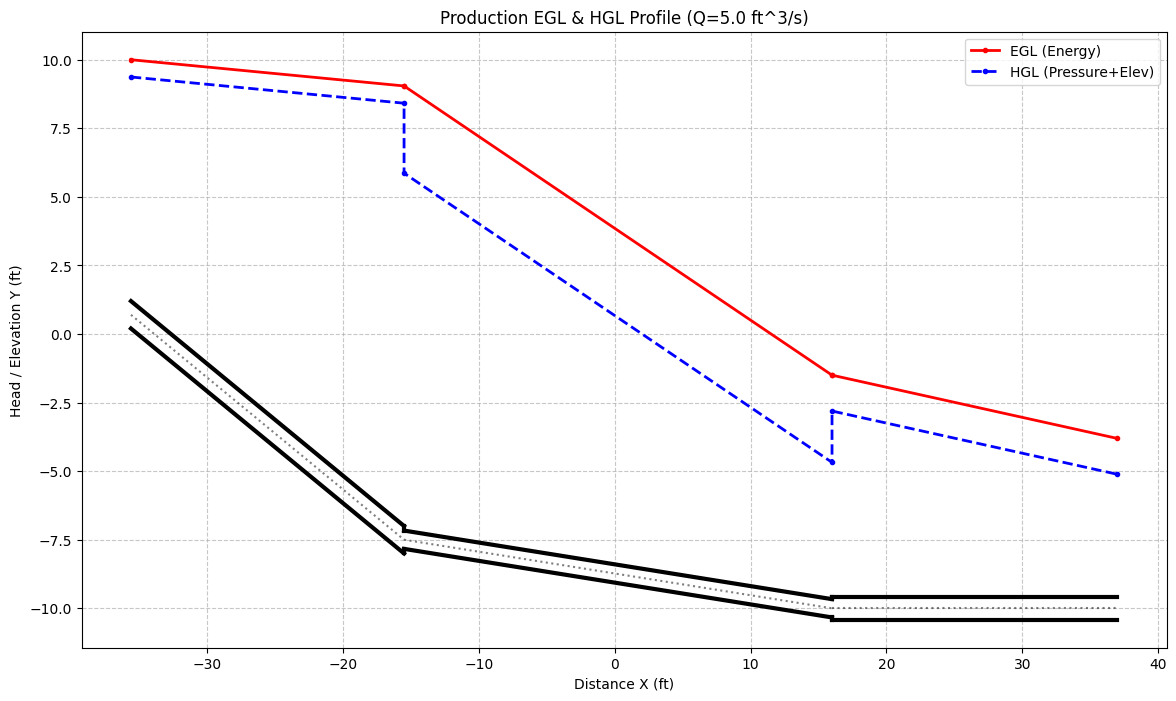

In [9]:
plt.figure(figsize=(14, 8))

# Plot EGL
plt.plot(egl_x, egl_y, 'r.-', label='EGL (Energy)', linewidth=2)

# Plot HGL
plt.plot(hgl_x, hgl_y, 'b.--', label='HGL (Pressure+Elev)', linewidth=2)

# Plot Physical Pipe Schematic (Projected to 2D)
path_points = np.array(points)
for i in range(len(diameters)):
    x_start = path_points[i][0]
    y_start = path_points[i][1]
    x_end = path_points[i+1][0]
    y_end = path_points[i+1][1]
    
    r = diameters[i] / 2
    
    # Draw simple lines for top/bottom of pipe relative to its centerline (y)
    # Note: Real pipe follows slope. We'll simplify visualization here by just offsetting from the line segment.
    plt.plot([x_start, x_end], [y_start + r, y_end + r], 'k-', linewidth=3)
    plt.plot([x_start, x_end], [y_start - r, y_end - r], 'k-', linewidth=3)
    
    # Centerline
    plt.plot([x_start, x_end], [y_start, y_end], 'k:', alpha=0.5)
    
    # Vertical connector if diameter changes
    if i < len(diameters) - 1:
        r_next = diameters[i+1] / 2
        plt.plot([x_end, x_end], [y_end + r, y_end + r_next], 'k-', linewidth=3)
        plt.plot([x_end, x_end], [y_end - r, y_end - r_next], 'k-', linewidth=3)

# Formatting
plt.title(f"Production EGL & HGL Profile (Q={Q} ft^3/s)")
plt.xlabel("Distance X (ft)")
plt.ylabel("Head / Elevation Y (ft)")
plt.legend()
plt.grid(True, which='both', linestyle='--', alpha=0.7)

plt.show()